### Importing libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Reading  & Understanding dataset

In [174]:
df = pd.read_csv(r"E:\DataScience\intellipaat\Datasets\python Datasets\OnlineRetail.csv",encoding='unicode_escape')

In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [176]:
df.shape

(541909, 8)

In [177]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [179]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [180]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Feature Engineering

In [181]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [182]:
df = df.dropna()

In [183]:
df.shape

(406829, 8)

In [184]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [185]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [186]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [187]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [188]:
# Frequency -> F -> Invoice Number
# Recency -> R -> Invoice Date
# Monetory -> M -> Total Amount

In [189]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [190]:
m = df.groupby('CustomerID')['Amount'].sum().reset_index()

In [191]:
m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [192]:
f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [193]:
f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [194]:
rfm = pd.merge(m,f,on='CustomerID',how='inner')

In [195]:
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [196]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [197]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [198]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [199]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [200]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [201]:
max(df['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [202]:
df['Date_Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']

In [203]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [204]:
r = df.groupby('CustomerID')['Date_Diff'].min().reset_index()

In [205]:
r.head()

,CustomerID,Date_Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [206]:
import datetime as dt

In [207]:
r['Date_Diff'] = r['Date_Diff'].dt.days

In [208]:
r.head()

,CustomerID,Date_Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [209]:
rfm = pd.merge(rfm,r,on='CustomerID',how='inner')

In [210]:
rfm.head()

,CustomerID,Amount,InvoiceNo,Date_Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [211]:
rfm.columns = ['CustomerID','Monetory','Frequency','Recency']

In [212]:
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [213]:
rfm.describe()

,Monetory,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


### Outlier Handling

In [214]:
X = list(rfm.columns)[1:]
X

['Monetory', 'Frequency', 'Recency']

<AxesSubplot:>

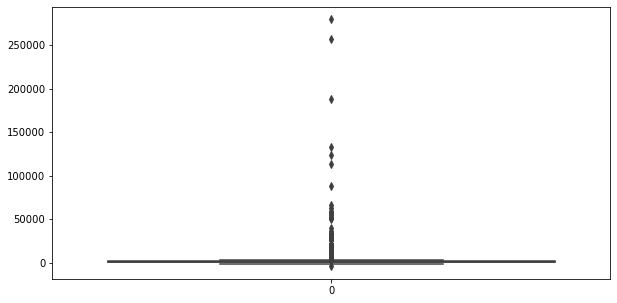

In [215]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[0]])

<AxesSubplot:>

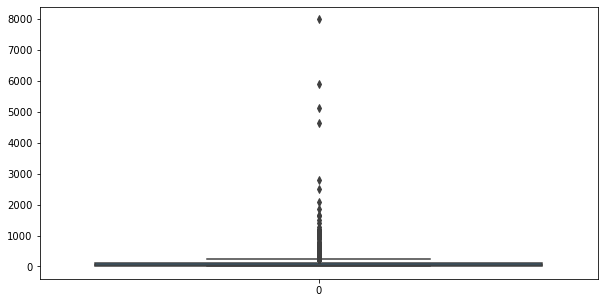

In [216]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[1]])

<AxesSubplot:>

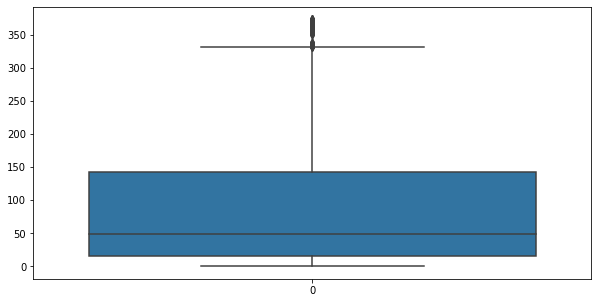

In [217]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[2]])

In [218]:
Q1 = rfm.Monetory.quantile(0.25)
Q3 = rfm.Monetory.quantile(0.75)
IQR = Q3 - Q1

In [219]:
"""Q3+1.5*IQR
Q1-1.5*IQR"""
rfm = rfm[(rfm.Monetory >= Q1-1.5*IQR) & (rfm.Monetory <= Q3+1.5*IQR)]

In [220]:
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1-1.5*IQR) & (rfm.Recency <= Q3+1.5*IQR)]

In [221]:

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1-1.5*IQR) & (rfm.Frequency <= Q3+1.5*IQR)]

In [222]:
df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
Amount         406829
Date_Diff      406829
dtype: int64

<AxesSubplot:>

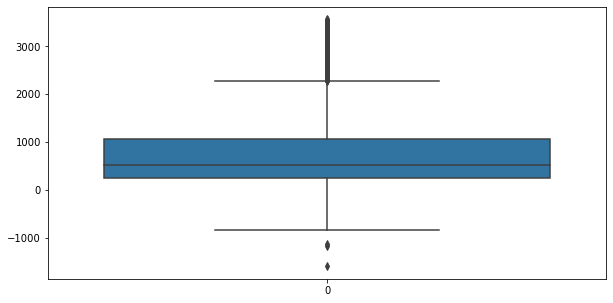

In [223]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[0]])

<AxesSubplot:>

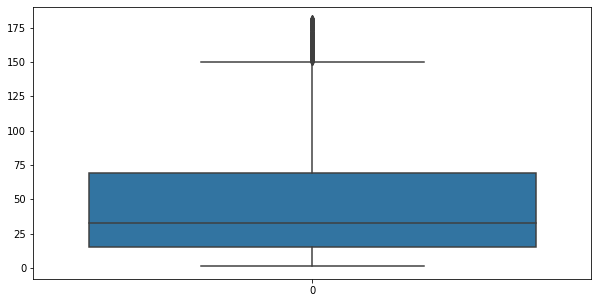

In [224]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[1]])

<AxesSubplot:>

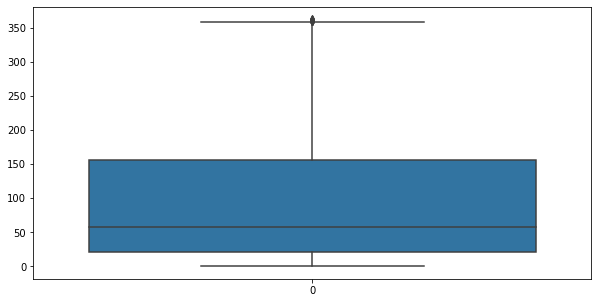

In [225]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[X[2]])

In [226]:
#if we remove the ouliers again then information will be lost
rfm.describe()

,Monetory,Frequency,Recency
count,3629.000000,3629.000000,3629.000000
mean,787.019433,47.736567,97.162855
std,745.191104,42.505471,96.901974
min,-1592.490000,1.000000,0.000000
25%,257.230000,15.000000,21.000000
50%,530.150000,33.000000,58.000000
75%,1065.350000,69.000000,156.000000
max,3563.850000,181.000000,362.000000


### Feature Scaling

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [228]:
rfm_scaled = sc.fit_transform(rfm[X])

In [229]:
rfm_scaled

array([[-1.05627655, -1.07616428,  2.35153665],
       [ 1.35583983, -0.39380514, -0.23906682],
       [ 1.30257099,  0.59443913, -0.81705007],
       ...,
       [-0.94780621, -0.95851616,  0.85497289],
       [-0.81925771, -0.8173384 , -0.93058249],
       [ 1.40957842,  0.52385025, -0.56934296]])

In [230]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled

,0,1,2
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591
...,...,...,...
3624,-0.822881,-0.911457,-0.249388
3625,-0.813889,-0.887927,1.856122
3626,-0.947806,-0.958516,0.854973
3627,-0.819258,-0.817338,-0.930582


In [231]:
rfm_scaled.columns = X
rfm_scaled

,Monetory,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591
...,...,...,...
3624,-0.822881,-0.911457,-0.249388
3625,-0.813889,-0.887927,1.856122
3626,-0.947806,-0.958516,0.854973
3627,-0.819258,-0.817338,-0.930582


### Model Building

In [232]:
from sklearn.cluster import KMeans

In [233]:
#inertia gives intercluster variance
ssd = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)

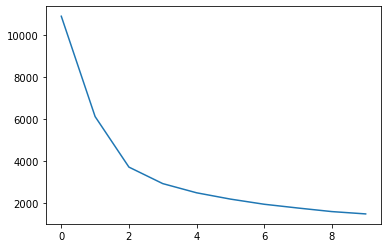

In [234]:
# take the K value after which there is no elbows so here cond=sider k=3
plt.plot(ssd)

In [235]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [236]:
kmeans.labels_

array([2, 0, 1, ..., 2, 0, 1])

In [237]:
rfm['clusterID'] = kmeans.labels_
rfm

,CustomerID,Monetory,Frequency,Recency,clusterID
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,1
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


<AxesSubplot:xlabel='clusterID', ylabel='Monetory'>

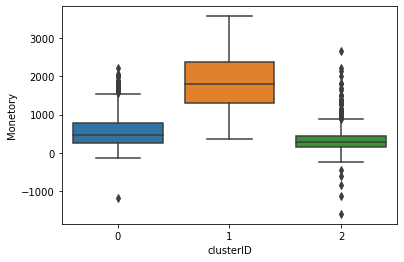

In [238]:
sns.boxplot(x='clusterID',y='Monetory',data=rfm)

<AxesSubplot:xlabel='clusterID', ylabel='Recency'>

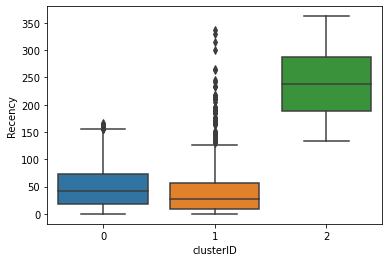

In [239]:
sns.boxplot(x='clusterID',y='Recency',data=rfm)

<AxesSubplot:xlabel='clusterID', ylabel='Frequency'>

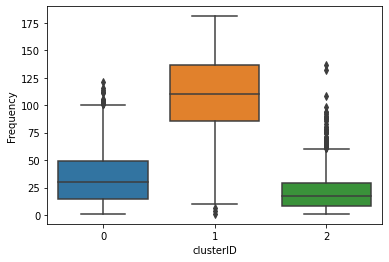

In [240]:
sns.boxplot(x='clusterID',y='Frequency',data=rfm)

### Data Analysis

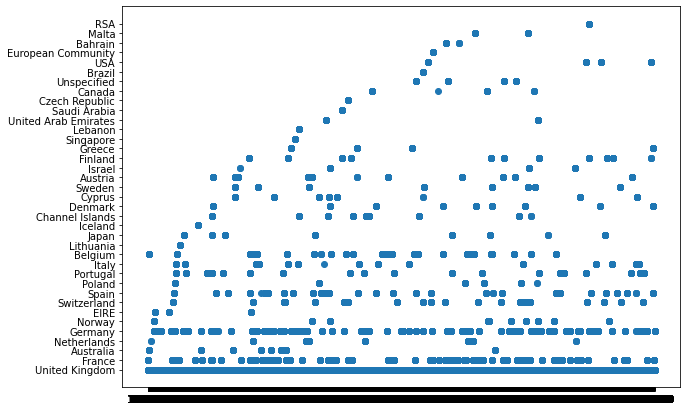

In [241]:
plt.figure(figsize = (10,7))
plt.scatter(df['CustomerID'],df['Country'])
plt.show()

Maximum customers are from United Kingdom followed by germany

In [242]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount', 'Date_Diff'],
      dtype='object')

In [243]:
df.pivot_table(index= ['Country'],values='Amount').sort_values(by ='Amount',ascending=False).head(10)


,Amount
Country,
Netherlands,120.059696
Australia,108.877895
Japan,98.716816
Sweden,79.211926
Denmark,48.247147
Lithuania,47.458857
Singapore,39.827031
Lebanon,37.641778
Brazil,35.737500


Netherlands is highetest purchasing country followed by Australia,Japan and Sweden	

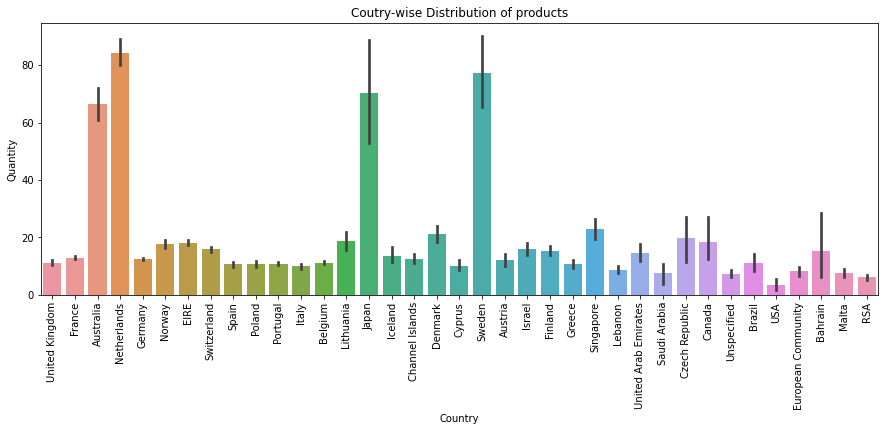

In [244]:
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(x = 'Country',y='Quantity',data=df)
plt.xticks(rotation=90)
plt.title('Coutry-wise Distribution of products')
plt.show()


<AxesSubplot:xlabel='clusterID', ylabel='Density'>

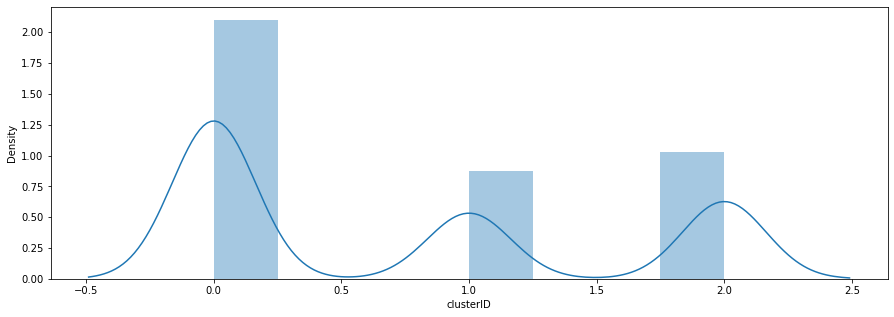

In [245]:
sns.distplot(rfm['clusterID'])

Here the maximum customers are from cluster 1

In [246]:
rfm.columns


Index(['CustomerID', 'Monetory', 'Frequency', 'Recency', 'clusterID'], dtype='object')

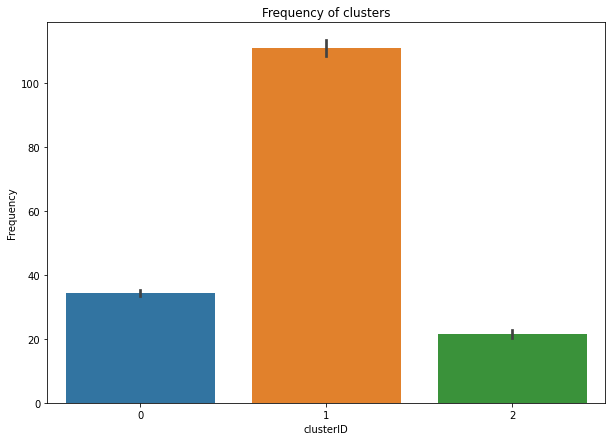

In [247]:
plt.figure(figsize=(10,7))
plt.title('Frequency of clusters')
sns.barplot(rfm['clusterID'],rfm['Frequency'])
plt.show()

The customers from clusterID '1' are frequently purchasing the products

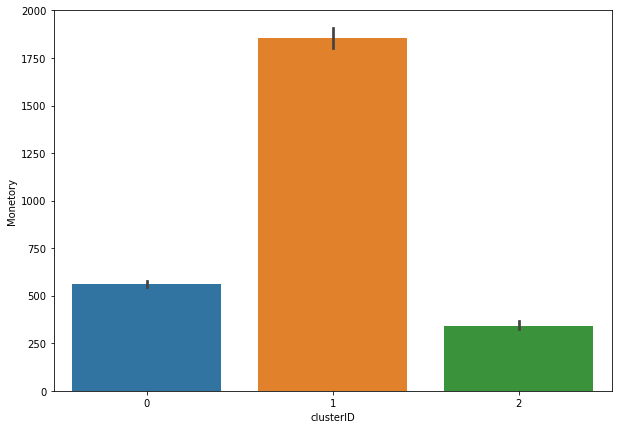

In [248]:
plt.figure(figsize=(10,7))
sns.barplot(rfm['clusterID'],rfm['Monetory'])
plt.show()

Maximum amount of money is geeting generated from clusterID '1' customers